In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/hotel_booking.csv')

In [3]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

Dataset contains 119390 rows and 36 columns


In [4]:
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [7]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [8]:
data.drop(['company'], axis=1, inplace=True)

In [9]:
country_mode = data['country'].mode()[0]
data['country'].fillna(country_mode, inplace=True)

In [10]:
children_mean = data['children'].mean()
data['children'].fillna(children_mean, inplace=True)


In [11]:
data['agent'].fillna(-1, inplace=True)

In [12]:
missing_values_after = data.isnull().sum()
print("Missing values after filling:\n", missing_values_after)

Missing values after filling:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                              

In [13]:
print("Descriptive statistics (numerical columns):\n", data.describe())

Descriptive statistics (numerical columns):
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000  

In [14]:
print("Descriptive statistics (categorical columns):\n", data.describe(include='object'))

Descriptive statistics (categorical columns):
              hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  119390         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   49078          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  \
count        119390        119390             119390                  119390   
unique            3             4                  3                     926   
top   

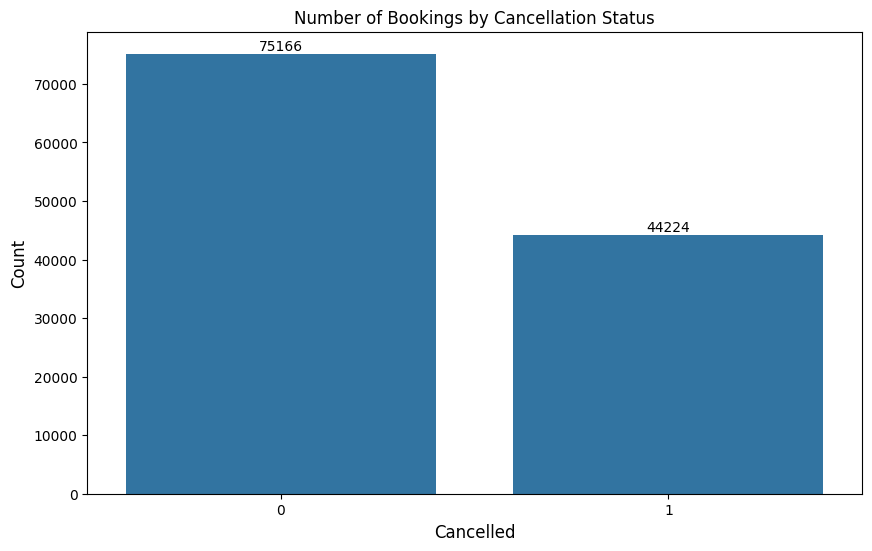

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='is_canceled', data=data)
ax.bar_label(ax.containers[0])
plt.title('Number of Bookings by Cancellation Status')
plt.xlabel('Cancelled',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

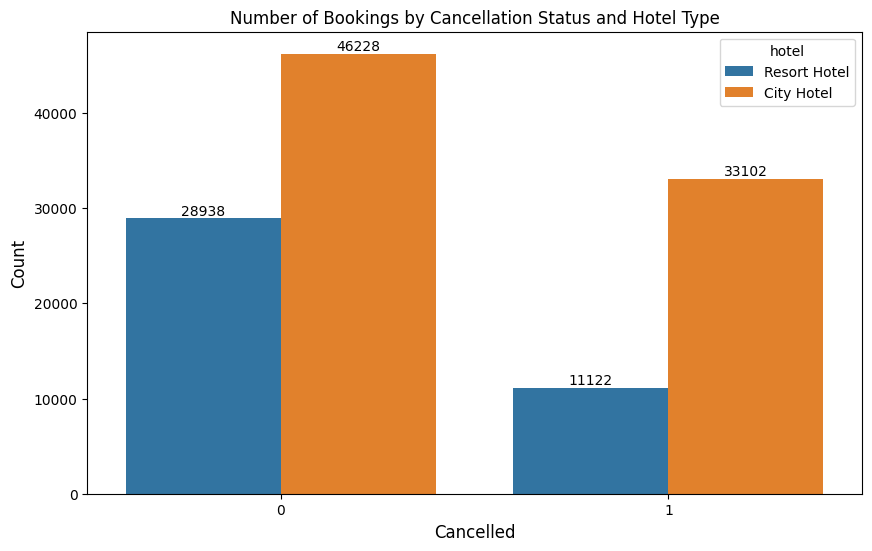

In [16]:
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='is_canceled', hue='hotel', data=data)
for container in count_plot.containers:
    count_plot.bar_label(container)
plt.title('Number of Bookings by Cancellation Status and Hotel Type')
plt.xlabel('Cancelled',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

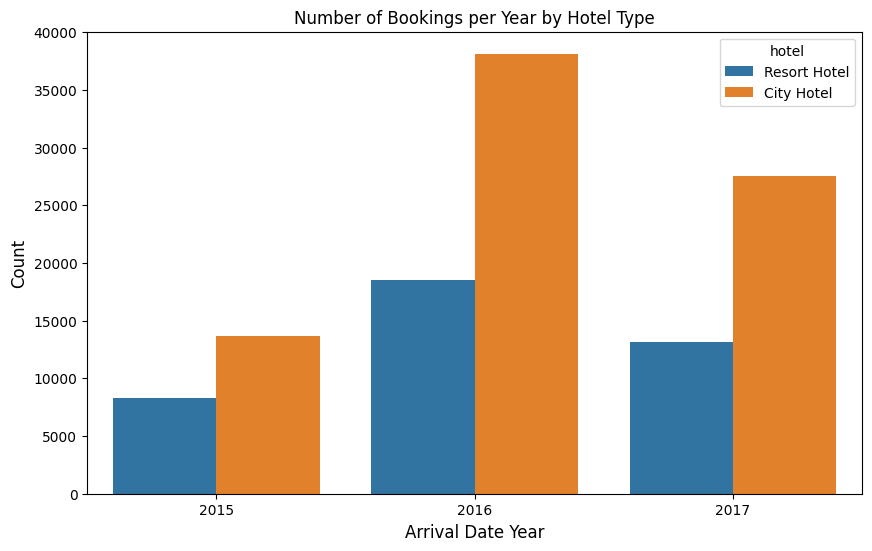

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_year', hue='hotel', data=data)
plt.title('Number of Bookings per Year by Hotel Type')
plt.xlabel('Arrival Date Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

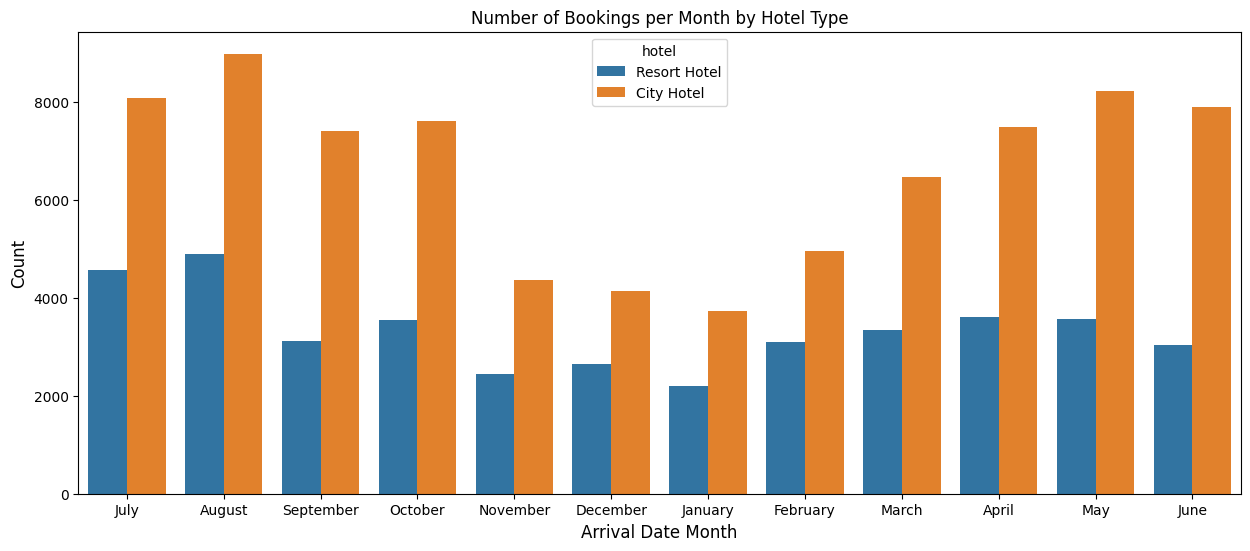

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x='arrival_date_month', hue='hotel', data=data)
plt.title('Number of Bookings per Month by Hotel Type')
plt.xlabel('Arrival Date Month',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

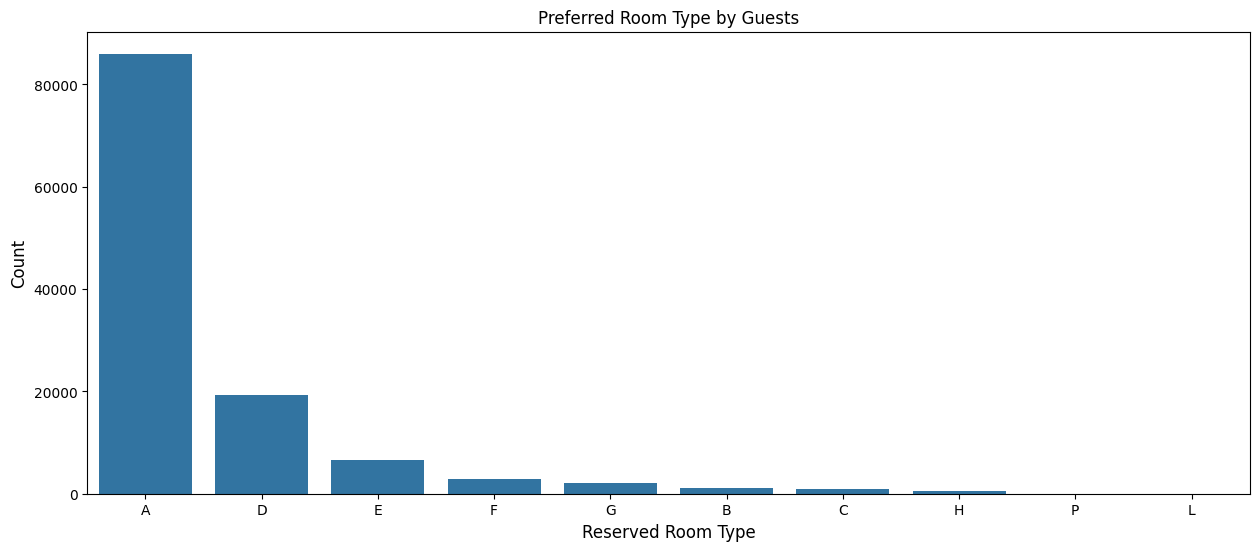

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(x='reserved_room_type', order=data['reserved_room_type'].value_counts().index, data=data)
plt.title('Preferred Room Type by Guests')
plt.xlabel('Reserved Room Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [20]:
filtered_data = data[data['lead_time'] > 0]

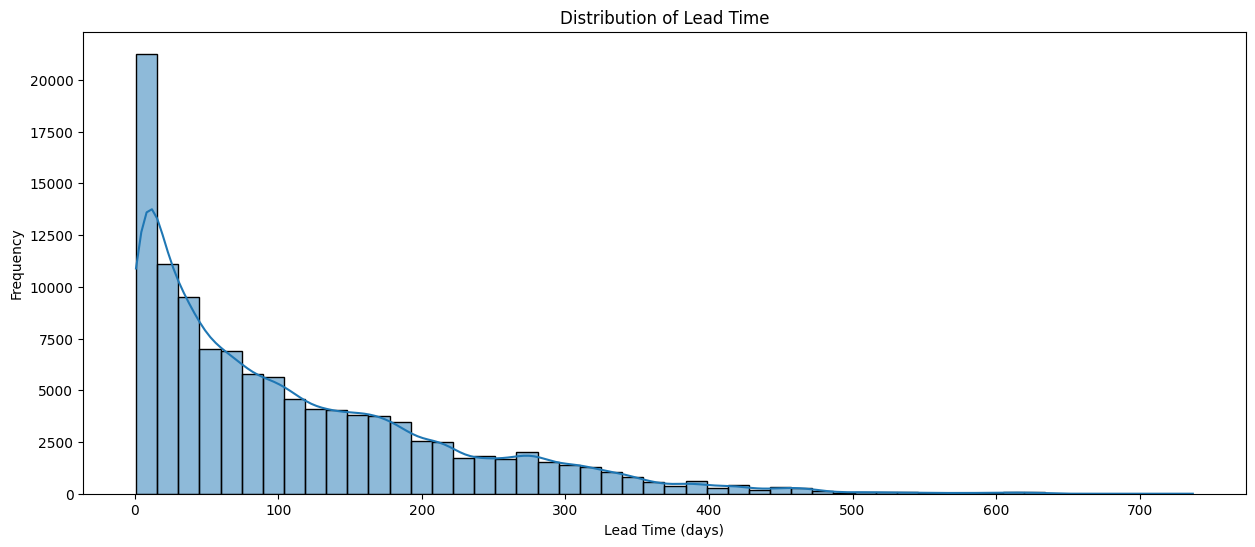

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(filtered_data['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

In [22]:
data['meal'] = data['meal'].str.strip().str.title()

In [23]:
filtered_data = data[data['meal'] != 'Undefined']

In [24]:
print("Unique values in the 'meal' column after filtering:", filtered_data['meal'].unique())

Unique values in the 'meal' column after filtering: ['Bb' 'Fb' 'Hb' 'Sc']


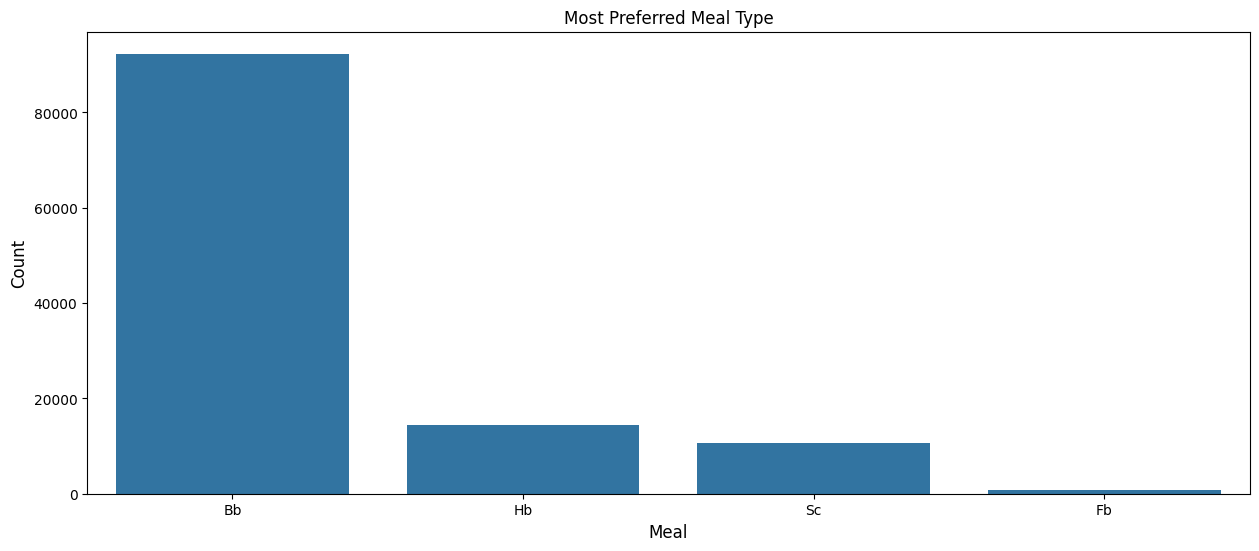

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(x='meal', order=filtered_data['meal'].value_counts().index, data=filtered_data)
plt.title('Most Preferred Meal Type')
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

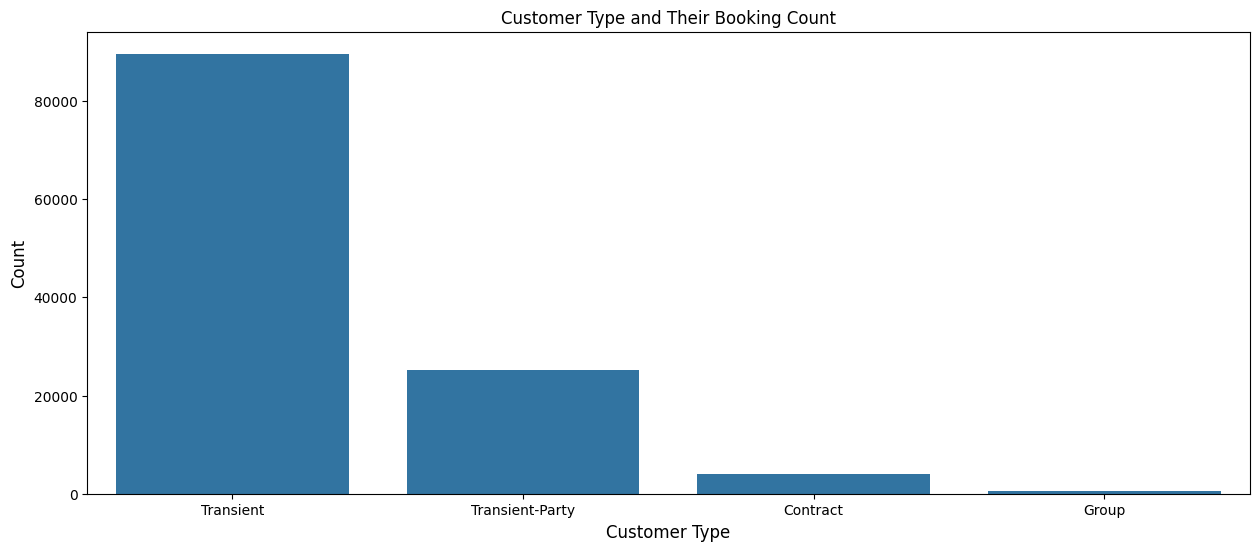

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(x='customer_type', order=data['customer_type'].value_counts().index, data=data)
plt.title('Customer Type and Their Booking Count')
plt.xlabel('Customer Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [27]:
data['market_segment'] = data['market_segment'].str.strip().str.title()

In [28]:
filtered_data = data[data['market_segment'] != 'Undefined']

In [29]:
print("Unique values in the 'market_segment' column after filtering:", filtered_data['market_segment'].unique())

Unique values in the 'market_segment' column after filtering: ['Direct' 'Corporate' 'Online Ta' 'Offline Ta/To' 'Complementary' 'Groups'
 'Aviation']


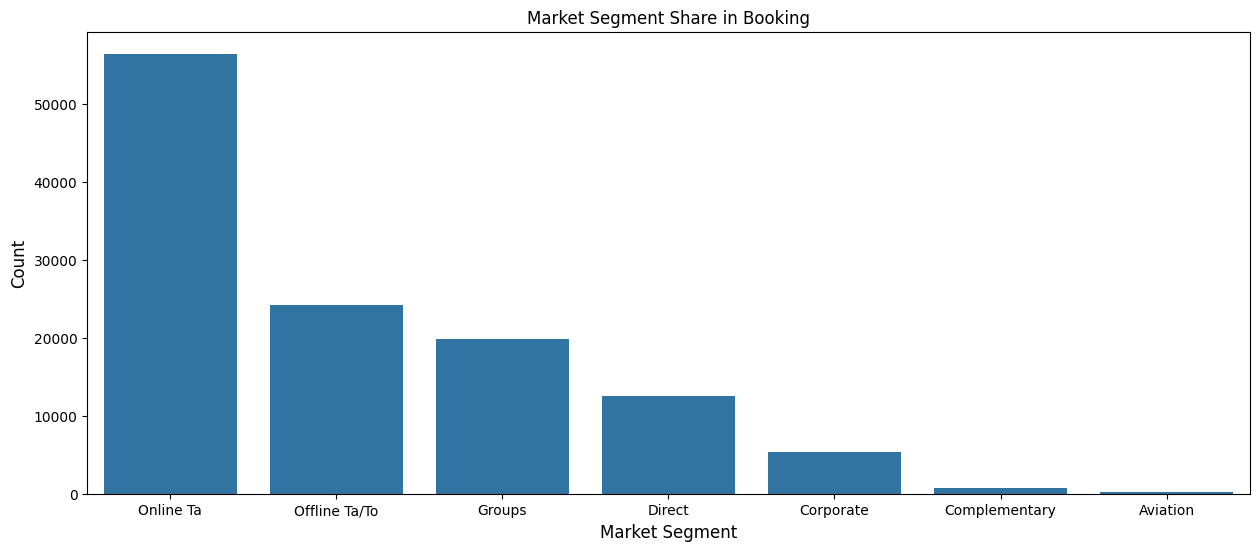

In [30]:
plt.figure(figsize=(15, 6))
sns.countplot(x='market_segment', order=filtered_data['market_segment'].value_counts().index, data=filtered_data)
plt.title('Market Segment Share in Booking')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

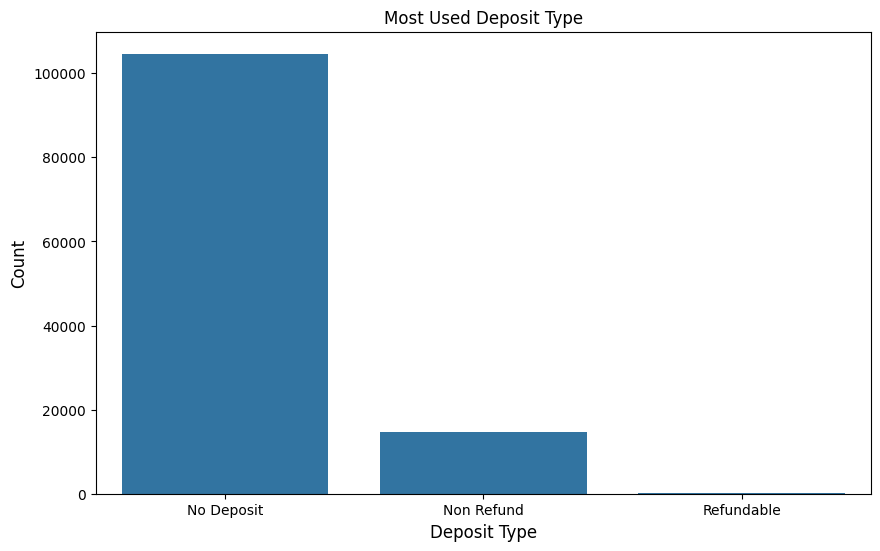

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', order=data['deposit_type'].value_counts().index, data=data)
plt.title('Most Used Deposit Type')
plt.xlabel('Deposit Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

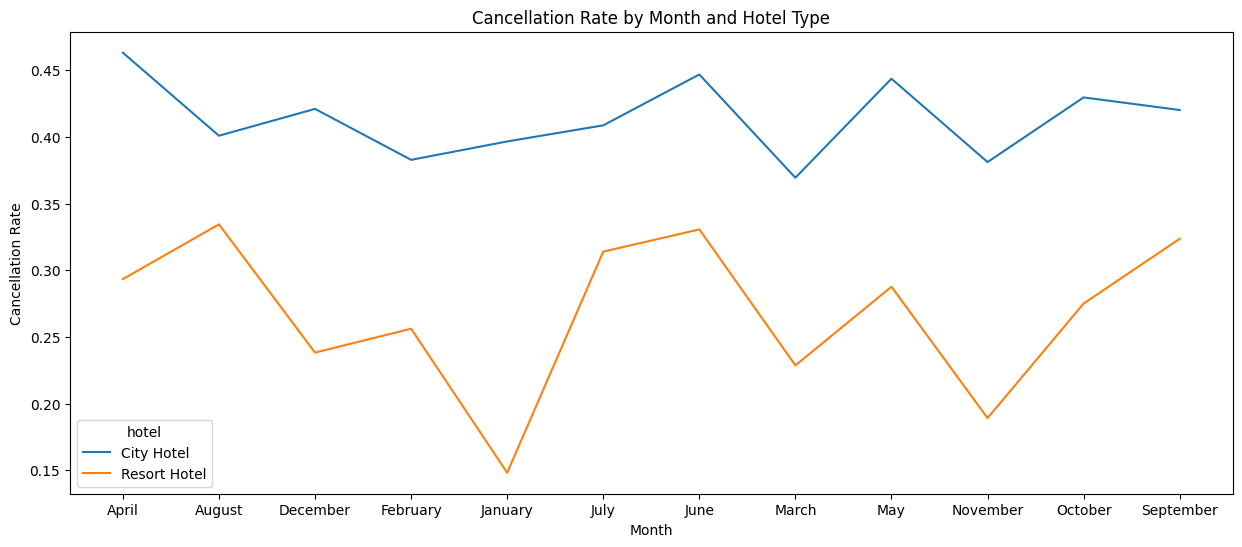

In [32]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='arrival_date_month', y='is_canceled', hue='hotel', data=data.groupby(['arrival_date_month', 'hotel'])['is_canceled'].mean().reset_index())
plt.title('Cancellation Rate by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()

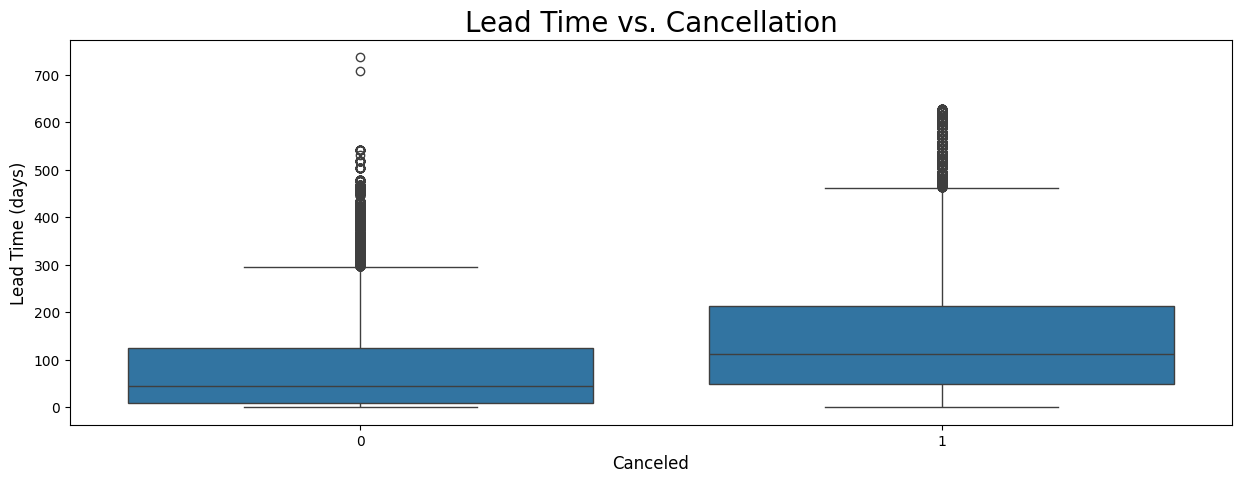

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs. Cancellation', fontsize=20)
plt.xlabel('Canceled', fontsize=12)
plt.ylabel('Lead Time (days)', fontsize=12)
plt.show()

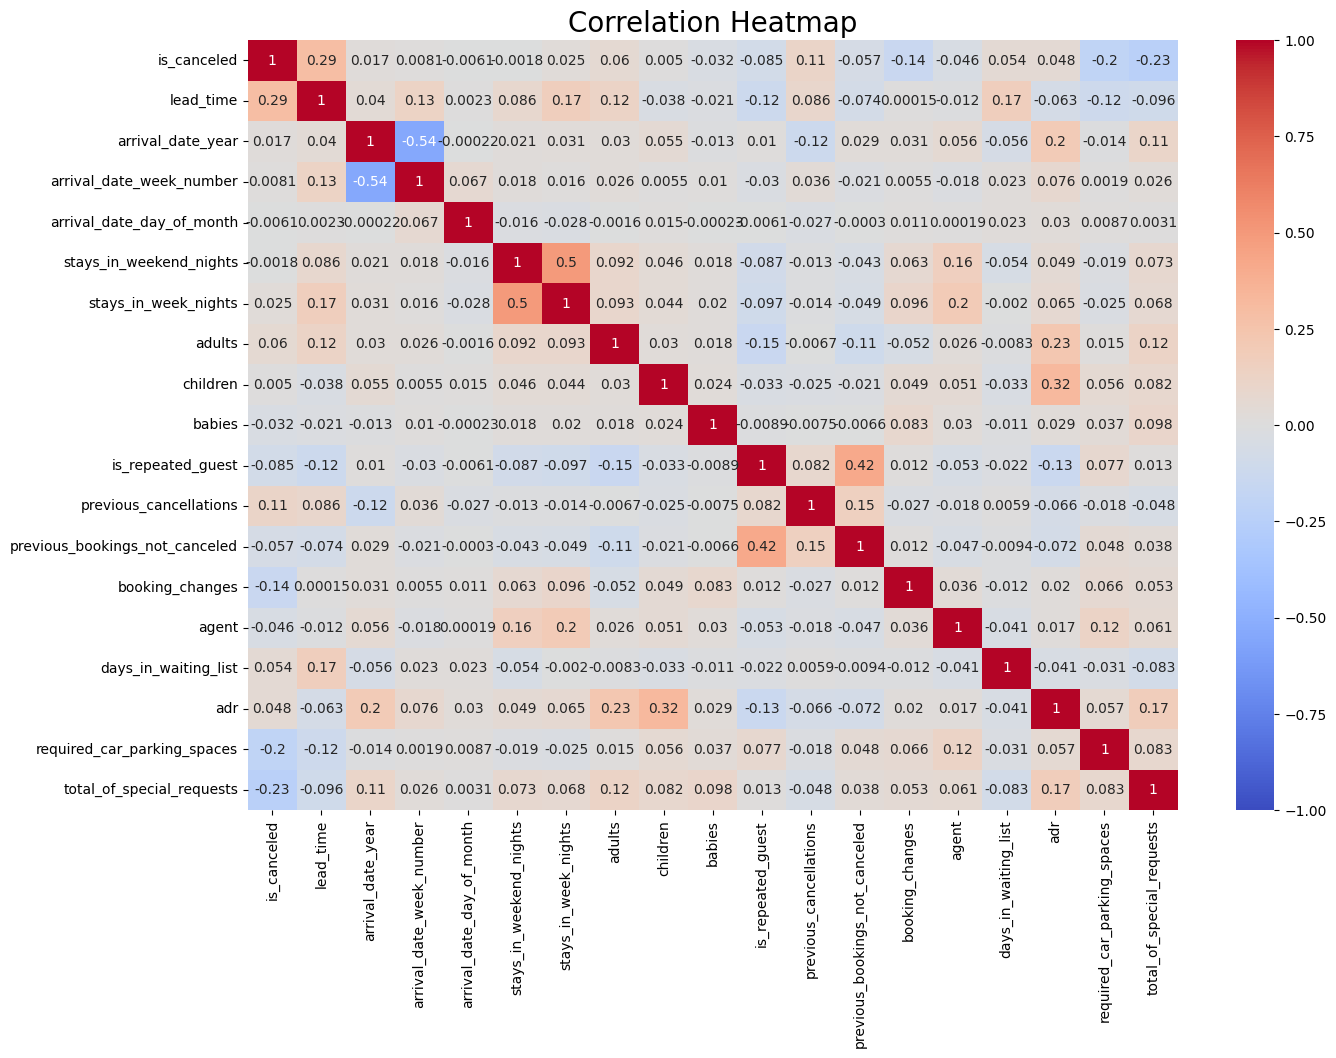

In [34]:
numerical_data = data.select_dtypes(include=[np.number])
corr = numerical_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

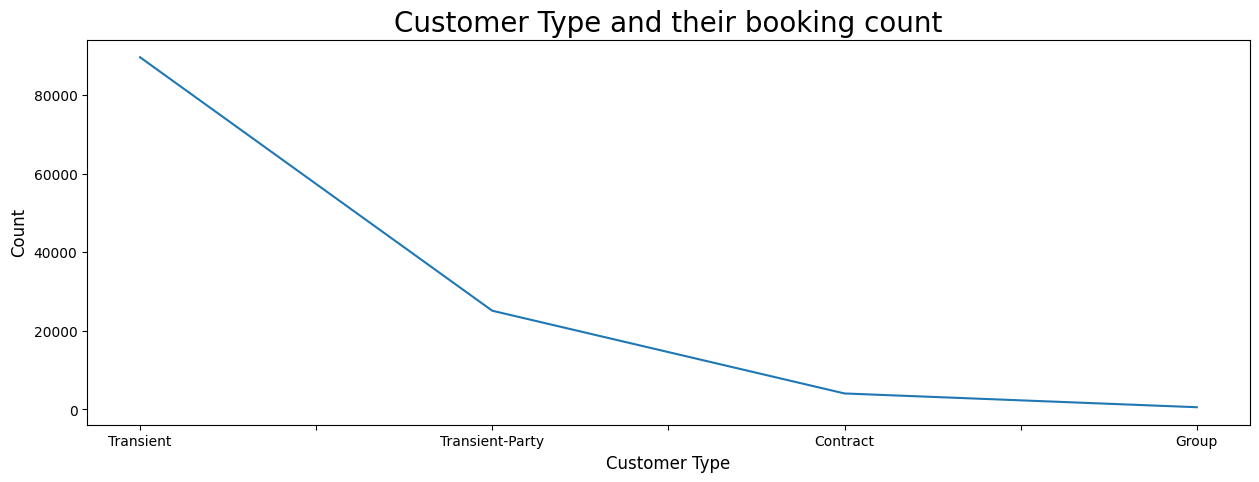

In [35]:
cust_type = data['customer_type'].value_counts()
cust_type.plot(figsize=(15,5))
plt.xlabel('Customer Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Customer Type and their booking count',fontsize=20)
plt.show()
